In [1]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json -O "C:\Clarenti\Data\Project\ML\Program\Dataset\NLP\Sarcasm\sarcasm.json"

--2022-08-22 20:35:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 34.101.5.112, 34.101.5.48, 34.101.5.80
Connecting to storage.googleapis.com (storage.googleapis.com)|34.101.5.112|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: 'C:/Clarenti/Data/Project/ML/Program/Dataset/NLP/Sarcasm/sarcasm.json'

     0K .......... .......... .......... .......... ..........  0%  263K 21s
    50K .......... .......... .......... .......... ..........  1%  152K 28s
   100K .......... .......... .......... .......... ..........  2% 91.7K 38s
   150K .......... .......... .......... .......... ..........  3% 88.4K 43s
   200K .......... .......... .......... .......... ..........  4%  156K 41s
   250K .......... .......... .......... .......... ..........  5%  179K 39s
   300K .......... 

In [1]:
import os
import json
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Readfile
json_file = r"C:\Clarenti\Data\Project\ML\Program\Dataset\NLP\Sarcasm\sarcasm.json" # r : raw
assert os.path.isfile(json_file)
with open(json_file, 'r') as f:
    ds = json.load(f)

In [3]:
# define var
vocabs = 1000 # this define max number of word to be saved to vocab list
oov_token = "<OOV>"
embedding_dim = 16

In [4]:
print(ds[0])

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}


In [5]:
# in datastore, there're 3 items -> article_link, headline, and is_sarcastic

links = []
headlines = []
labels = []

# looping items in ds

for item in ds:
    links.append(item['article_link'])
    headlines.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [6]:
# Split train_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(headlines, labels, test_size=0.2, stratify=labels)

In [7]:
print(X_train[0])
print(y_train[0])

white roof, low energy
0


In [8]:
# Tokenization
tokenizer = Tokenizer(num_words=vocabs, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [9]:
X_train_index_per_word = tokenizer.word_index
X_train_index_per_word

{'<OOV>': 1,
 'to': 2,
 'of': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'new': 12,
 'trump': 13,
 'man': 14,
 'from': 15,
 'at': 16,
 'about': 17,
 'you': 18,
 'by': 19,
 'this': 20,
 'be': 21,
 'up': 22,
 'after': 23,
 'how': 24,
 'out': 25,
 'as': 26,
 'that': 27,
 'it': 28,
 'not': 29,
 'are': 30,
 'your': 31,
 'his': 32,
 'what': 33,
 'just': 34,
 'he': 35,
 'will': 36,
 'who': 37,
 'has': 38,
 'all': 39,
 'more': 40,
 'report': 41,
 'one': 42,
 'year': 43,
 'into': 44,
 'area': 45,
 'have': 46,
 'why': 47,
 'u': 48,
 'over': 49,
 's': 50,
 'says': 51,
 'day': 52,
 'donald': 53,
 'can': 54,
 'woman': 55,
 'first': 56,
 'time': 57,
 'her': 58,
 'get': 59,
 'like': 60,
 'old': 61,
 "trump's": 62,
 'off': 63,
 'obama': 64,
 'life': 65,
 'no': 66,
 'an': 67,
 'people': 68,
 'now': 69,
 'back': 70,
 'was': 71,
 "'": 72,
 'house': 73,
 'than': 74,
 'women': 75,
 'still': 76,
 'make': 77,
 'i': 78,
 'my': 79,
 'clinton': 80,
 'down': 81,
 'w

In [10]:
# encode training text to sequence
    # or using one_hot() to encode
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq[0]

[82, 1, 636, 839]

In [11]:
# apply padding and truncating 
    # padding "post": data will be padded with 0 for the remaining space adjust to the number of maxlen.
    # truncating "post": data will be cut if the sequence is longer than maxlen.
    
maxlen = max(len(i) for i in X_train_seq) # find max length of the sentences
X_train_pad_seq = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post') # padding = same
X_train_pad_seq

array([[ 82,   1, 636, ...,   0,   0,   0],
       [ 48,  50,   1, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       ...,
       [  1,   1,   1, ...,   0,   0,   0],
       [304,   1, 578, ...,   0,   0,   0],
       [ 14,  29, 448, ...,   0,   0,   0]])

In [19]:
# NN Layer
model = tf.keras.models.Sequential(layers=[
    # apply embedding layer that has vocab size of 1000, and an input len of maxlen
    # output for this layer will have 'maxlen' rows/vectors (as total words) with 'embedding_dim' features/dimension for each word.
    # so, total of the data = maxlen * embedding_dim for 1 sentence.
    tf.keras.layers.Embedding(vocabs, embedding_dim, input_length=maxlen),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(name='hidden', units=32, activation='relu'),
    tf.keras.layers.Dense(name='output', units=1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 16)            16000     
                                                                 
 flatten_1 (Flatten)         (None, 640)               0         
                                                                 
 hidden (Dense)              (None, 32)                20512     
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 36,545
Trainable params: 36,545
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
print(type(y_train))
print(type(X_train_pad_seq))

<class 'list'>
<class 'numpy.ndarray'>


In [21]:
hist = model.fit(X_train_pad_seq, np.array(y_train),epochs=25, verbose=1)

Epoch 1/25
668/668 [==============================] - 3s 3ms/step - loss: 0.4585 - accuracy: 0.7680
Epoch 2/25
668/668 [==============================] - 2s 3ms/step - loss: 0.3223 - accuracy: 0.8549
Epoch 3/25
668/668 [==============================] - 2s 3ms/step - loss: 0.2898 - accuracy: 0.8709
Epoch 4/25
668/668 [==============================] - 2s 3ms/step - loss: 0.2630 - accuracy: 0.8839
Epoch 5/25
668/668 [==============================] - 2s 3ms/step - loss: 0.2364 - accuracy: 0.8996
Epoch 6/25
668/668 [==============================] - 2s 3ms/step - loss: 0.2099 - accuracy: 0.9140
Epoch 7/25
668/668 [==============================] - 2s 3ms/step - loss: 0.1857 - accuracy: 0.9265
Epoch 8/25
668/668 [==============================] - 3s 4ms/step - loss: 0.1646 - accuracy: 0.9348
Epoch 9/25
668/668 [==============================] - 3s 4ms/step - loss: 0.1479 - accuracy: 0.9437
Epoch 10/25
668/668 [==============================] - 2s 3ms/step - loss: 0.1330 - accuracy: 0.9491

In [22]:
acc = hist.history['accuracy']

<Figure size 432x288 with 0 Axes>

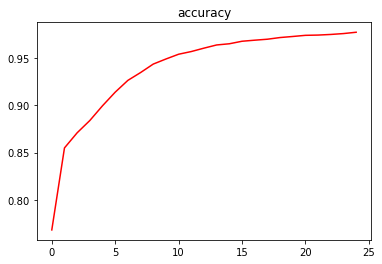

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(acc, 'r', label='training accuracy')
plt.title('accuracy')
plt.figure()

In [25]:
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad_seq = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')

In [26]:
print(X_test_seq[2])

word_list = tokenizer.sequences_to_texts(X_test_seq)
word_list[2]

[20, 354, 1, 232, 38, 158, 1, 6, 67, 1, 678]


'this former <OOV> star has high <OOV> for an <OOV> career'

In [27]:
model.evaluate(X_test_pad_seq, np.array(y_test))

167/167 [==============================] - 1s 2ms/step - loss: 1.3373 - accuracy: 0.7741


[1.3373421430587769, 0.7740546464920044]